# Importing Necessary Libary

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/advertising.csv')

In [4]:
data.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


# Data Preprocessing

In [5]:
data.shape

(200, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
df = data.corr()
df

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# Data Visualization

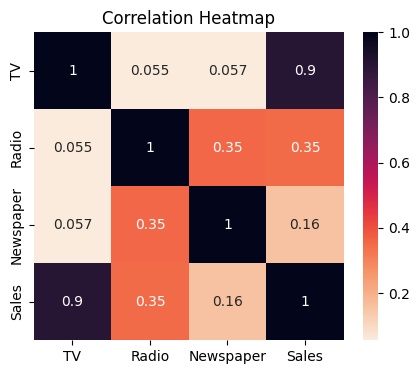

In [11]:
plt.figure(figsize = (5, 4))
sns.heatmap(df, annot = True, cmap = 'rocket_r')
plt.title("Correlation Heatmap")
plt.show()

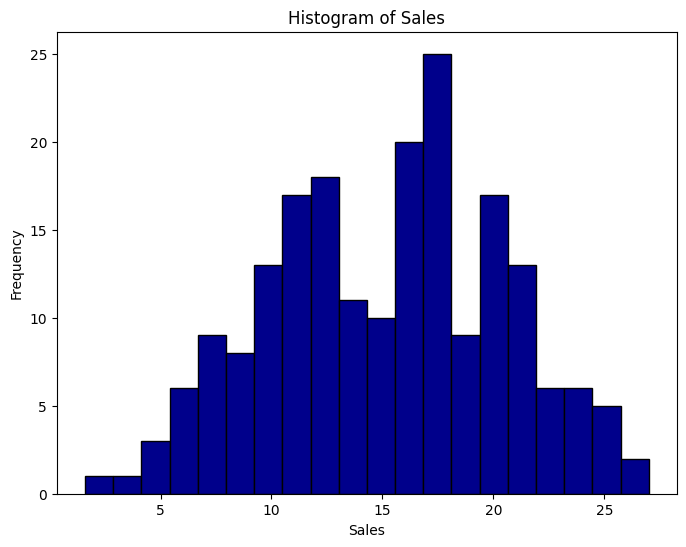

In [12]:
plt.figure(figsize = (8, 6))
plt.hist(data['Sales'], bins = 20, color = 'darkblue', edgecolor = 'black')
plt.title("Histogram of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Data Modeling

In [13]:
# dividing the X and the Y from the dataset
X = data.drop(['Sales'], axis = 1)
Y = data["Sales"]
print(X.shape)
print(Y.shape)
xData = X.values
yData = Y.values

(200, 3)
(200,)


# Training and Testing data

In [23]:
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

In [24]:
print(xData.shape, xTrain.shape, xTest.shape, yTrain.shape)

(200, 3) (160, 3) (40, 3) (160,)


# Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Linear Regression Model")
linear_model = LinearRegression()
linear_model.fit(xTrain, yTrain)
y_pred_linear = linear_model.predict(xTest)
print("Mean Squared Error:", mean_squared_error(yTest, y_pred_linear))
print("R-squared:", r2_score(yTest, y_pred_linear))

Linear Regression Model
Mean Squared Error: 2.9077569102710923
R-squared: 0.9059011844150826


In [26]:
predicted_data = pd.DataFrame(data = {"Actual Sales": yTest, "Predicted Sales": y_pred_linear.flatten()})
print("Sample of Predicted vs Actual Sales:")
print(predicted_data.head(10))

Sample of Predicted vs Actual Sales:
   Actual Sales  Predicted Sales
0          16.9        17.034772
1          22.4        20.409740
2          21.4        23.723989
3           7.3         9.272785
4          24.7        21.682719
5          12.6        12.569402
6          22.3        21.081195
7           8.4         8.690350
8          16.5        17.237013
9          16.1        16.666575
